In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [70]:
df=pd.read_csv('Flight price prediction.csv')

In [71]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [72]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [75]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,300153,6,Vistara,127859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flight,300153,1561,UK-706,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_city,300153,6,Delhi,61343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departure_time,300153,6,Morning,71146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stops,300153,3,one,250863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_time,300153,6,Night,91538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_city,300153,6,Mumbai,59097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,300153,2,Economy,206666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,300153.00,NaN,NaN,NaN,12.22,7.19,0.83,6.83,11.25,16.17,49.83
days_left,300153.00,NaN,NaN,NaN,26.00,13.56,1.00,15.00,26.00,38.00,49.00


In [76]:
#usually in cases of Flight ticket prices, Flight model number doesnt give a big difference in the price.Hence,dropping the 
#flight column
df.drop('flight',axis=1,inplace=True)

### Uni-Variate Analysis

<Axes: ylabel='duration'>

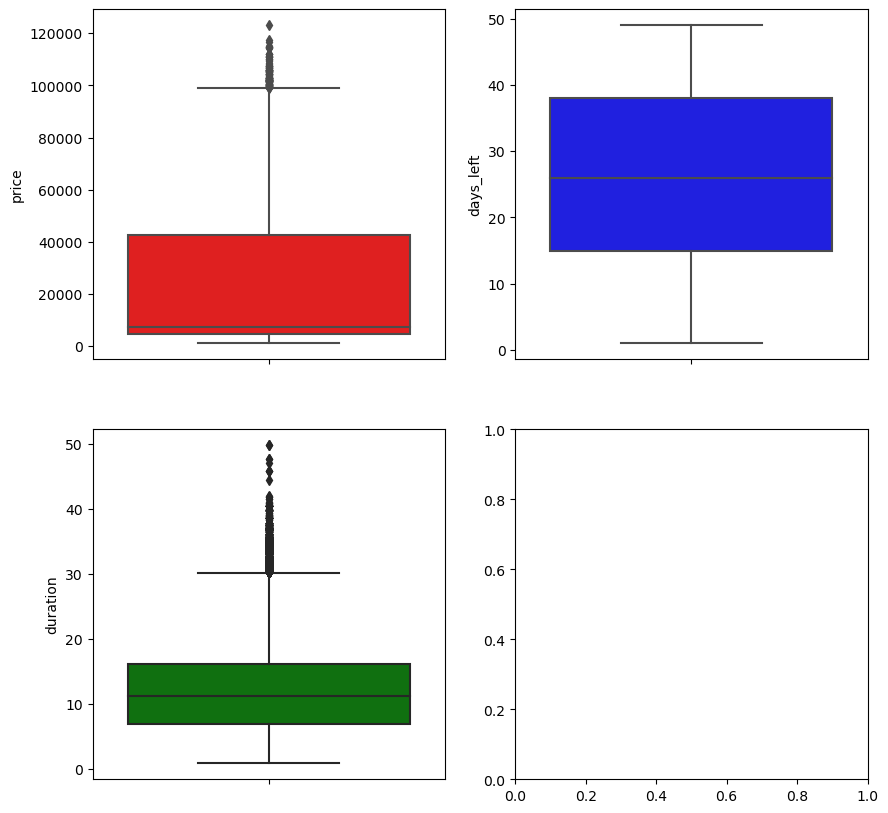

In [79]:
#price columns seems skewed and might contain outliers as well
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.boxplot(df,y='price',ax=ax[0,0],color='r')
sns.boxplot(df,y='days_left',ax=ax[0,1],color='b')
sns.boxplot(df,y='duration',ax=ax[1,0],color='g')

In [80]:
df.head(0)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


<Axes: xlabel='class', ylabel='count'>

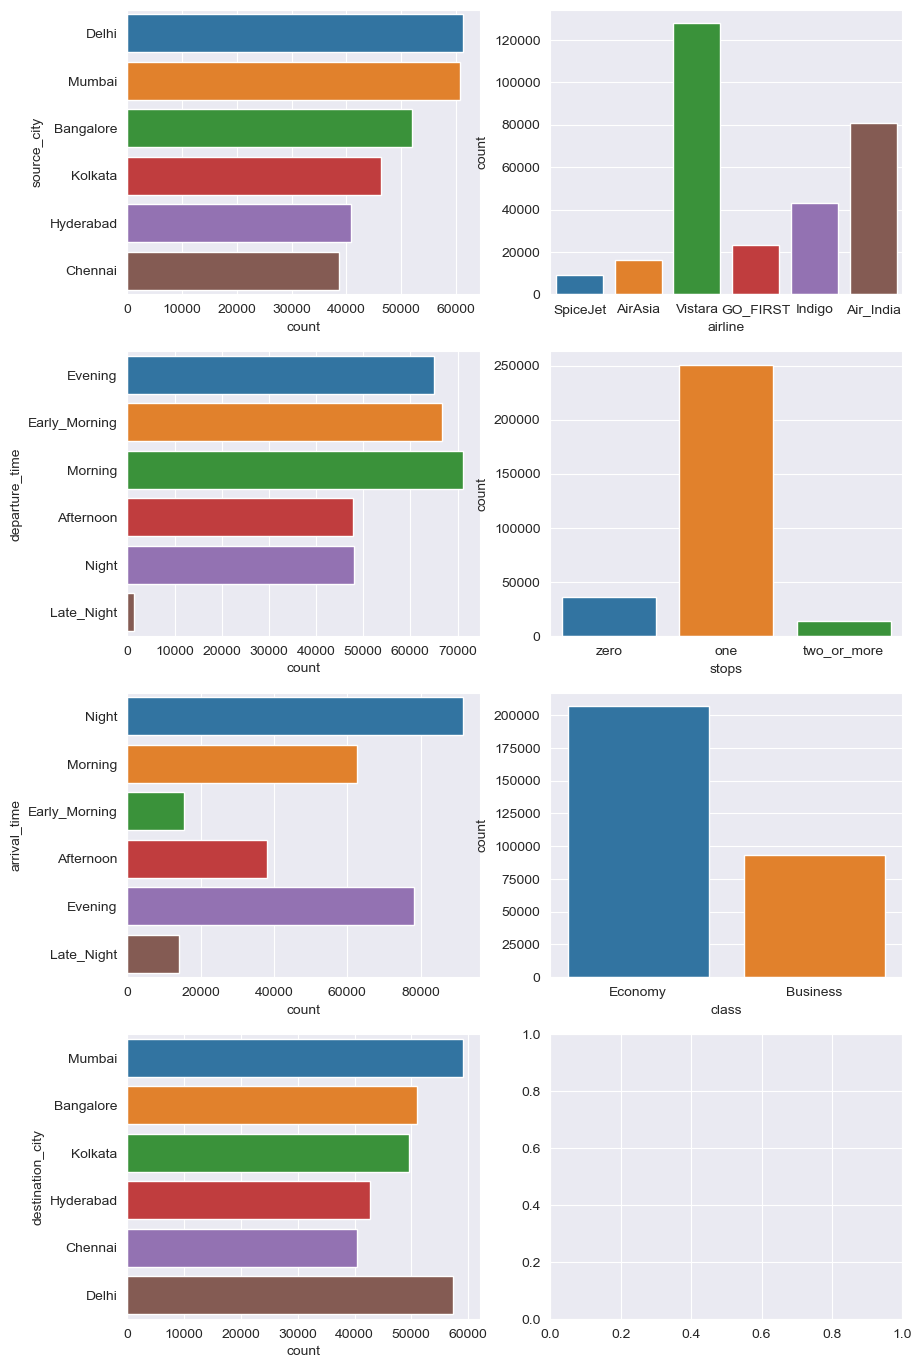

In [93]:
sns.set_style('darkgrid')
fig,ax=plt.subplots(4,2,figsize=(10,17))

sns.countplot(df,x='airline',ax=ax[0,1])
sns.countplot(df,y='source_city',ax=ax[0,0])
sns.countplot(df,y='departure_time',ax=ax[1,0])
sns.countplot(df,x='stops',ax=ax[1,1])
sns.countplot(df,y='arrival_time',ax=ax[2,0])
sns.countplot(df,y='destination_city',ax=ax[3,0])
sns.countplot(df,x='class',ax=ax[2,1])


1)Most of the flights are being booked between Mumbai and Delhi

2)Most  of the passengers have booked flight in the early_morning/morning and reached their destination at night or evening

3)There more economy seats than business class

4)Majority of the passengers booked Vistara and Air India flights

<Axes: xlabel='days_left', ylabel='Count'>

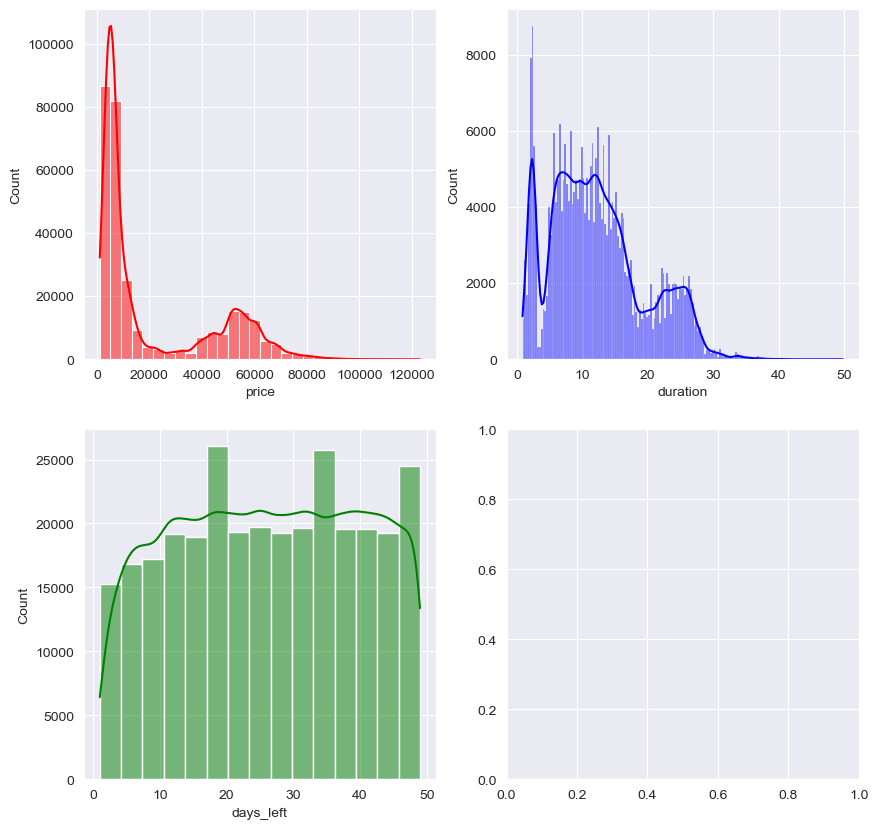

In [94]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.histplot(df,x='price',ax=ax[0,0],kde=True,color='r',bins=30)
sns.histplot(df,x='duration',ax=ax[0,1],kde=True,color='b')
sns.histplot(df,x='days_left',ax=ax[1,0],kde=True,color='g',bins=15)
#Price column is right skewed and lot of prices are concentrated around 10k-60k
#duration is concentrated around 5-20 hours

### Bi-Variate Analysis

In [95]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<Axes: xlabel='duration', ylabel='price'>

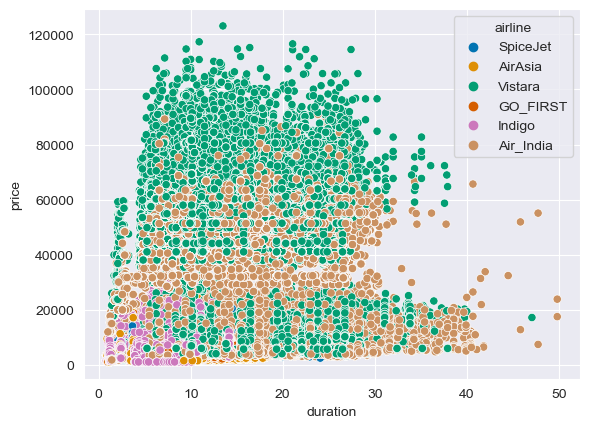

In [101]:
sns.scatterplot(df,x='duration',y='price',hue='airline',palette='colorblind')
#from below visualisation we can see that, air asia and Indigo flights are having lest duration and Air india and Vistara 
#flights are with higher duration.


<Axes: xlabel='duration', ylabel='price'>

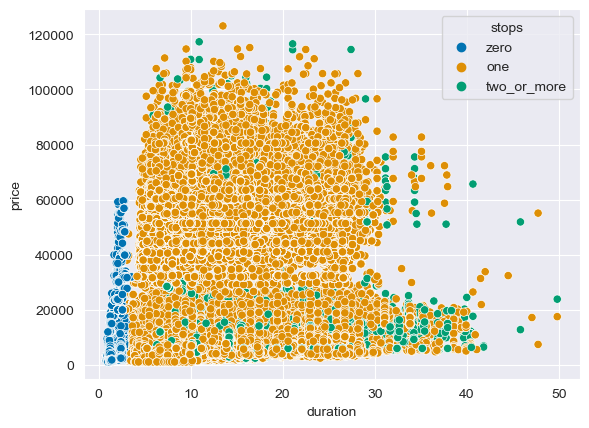

In [102]:
sns.scatterplot(df,x='duration',y='price',hue='stops',palette='colorblind')

<Axes: xlabel='days_left', ylabel='price'>

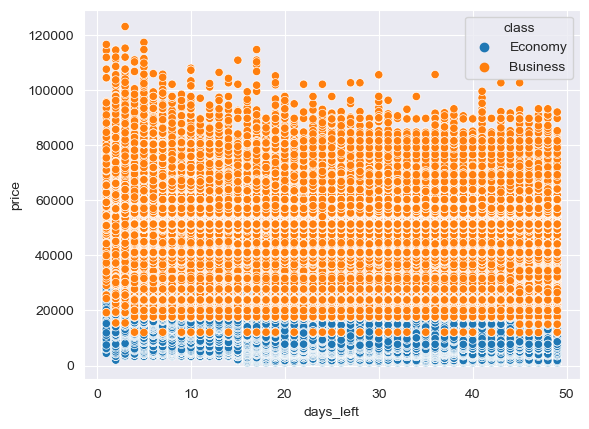

In [104]:
sns.scatterplot(df,x='days_left',y='price',hue='class')
#Prices slightly decrease if booked in advance

Text(0.5, 1.0, 'Price per stops and Airline')

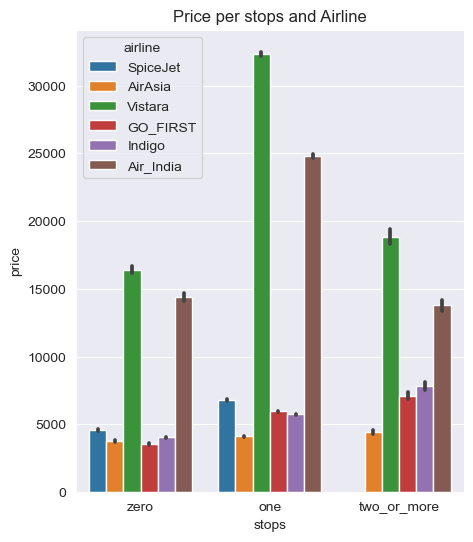

In [114]:
plt.figure(figsize=(5, 6))
sns.barplot(df,x='stops',y='price',hue='airline',).set_title('Price per stops and Airline')
#on average flights with one stop is with high price.

Text(0.5, 1.0, 'Price per class and Airline')

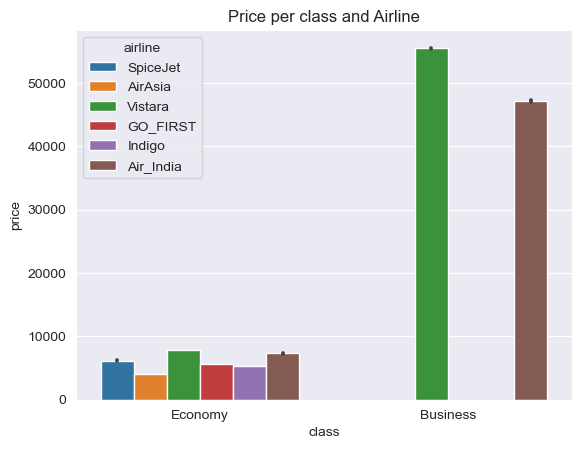

In [115]:
sns.barplot(df,x='class',y='price',hue='airline',).set_title('Price per class and Airline')
#its obvious that economy prices will be cheaper compared to Business class

In [116]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<Axes: ylabel='departure_time'>

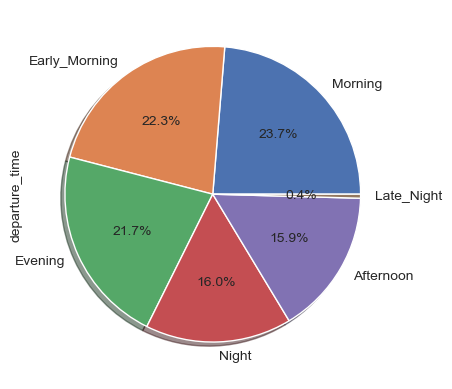

In [117]:
df['departure_time'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('deep'),shadow=True)
#there are very less late night flights. Morning flights are preferred more by the passengers.

In [122]:
df.groupby(['class','source_city'])[['duration','price']].mean()

duration    price
class    source_city                   
Business Bangalore       13.87 53723.54
         Chennai         14.14 54140.53
         Delhi           12.87 48697.98
         Hyderabad       14.04 50370.47
         Kolkata         15.07 56607.86
         Mumbai          12.92 52740.52
Economy  Bangalore       11.18  6582.06
         Chennai         12.22  6606.28
         Delhi           10.94  6288.59
         Hyderabad       11.45  6235.77
         Kolkata         12.50  7458.63
         Mumbai          11.39  6358.92

### outliers

In [123]:
df_num=df.select_dtypes('number')

In [124]:
Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR

In [129]:
df=df[((df_num>lower_bound)&(df_num<upper_bound)).all(axis='columns')]

<Axes: ylabel='duration'>

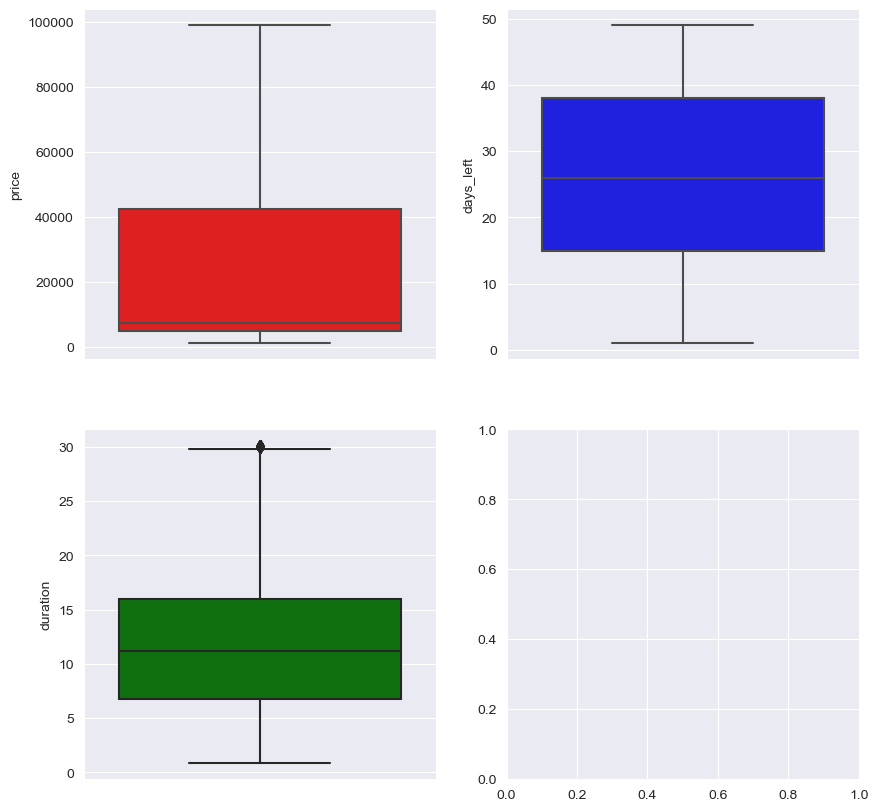

In [130]:
#we willplot the box plots to check the outliers again
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.boxplot(df,y='price',ax=ax[0,0],color='r')
sns.boxplot(df,y='days_left',ax=ax[0,1],color='b')
sns.boxplot(df,y='duration',ax=ax[1,0],color='g')

In [ ]:
#now most of the outliers are gone.we will proceed with the Train test Split

### train test split

In [133]:
X=df.drop('price',axis=1)
y=df['price']
X_num=X.select_dtypes('number')
X_cat=X.select_dtypes('object')
X_cat_encoded=pd.get_dummies(X_cat,dtype=int)
X=pd.concat([X_num,X_cat_encoded],axis=1)
X_cat_encoded.shape

(297920, 35)

In [134]:
X.shape,y.shape

((297920, 37), (297920,))

### CV score method in function

In [ ]:
def cv(X,y):
    #mape_train_lst=[]
    mape_test_lst=[]
    CV_mape_lst=[]
    for k in list(range(1,30,2)):
        print('entered 1st for')
        for j in list(range(1,3)):
            print('entered second for')
            X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,test_size=0.3)
            print(X_train.shape,y_train.shape)
            model=KNeighborsRegressor(n_neighbors=k)
            model.fit(X_train,y_train)
            #y_train_pred=model.predict(X_train)
            #Mape_train=mean_absolute_percentage_error(y_train,y_train_pred)
            #mape_train_lst.append(Mape_train)
            y_test_pred=model.predict(X_test)
            print(y_test_pred.shape)
            Mape_test=mean_absolute_percentage_error(y_test,y_test_pred)
            print(Mape_test)
            mape_test_lst.append(Mape_test)
        CV_mape_lst.append(np.mean(mape_test_lst))
    print(CV_mape_lst)
    return CV_mape_lst

    
            
CV_scores=cv(X,y)

### Hold out Method

In [160]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,test_size=0.3)

In [166]:
X_train_half,X_test_half,y_train_half,y_test_half = train_test_split(X_train,y_train,train_size=0.70,test_size=0.3)

In [168]:
X_train_half1,X_test_half1,y_train_half1,y_test_half1 = train_test_split(X_train_half,y_train_half,train_size=0.70,test_size=0.3)

In [171]:
X_train_half1.shape,y_train_half1.shape,X_test_half1.shape,y_test_half1.shape

((102186, 37), (102186,), (43794, 37), (43794,))

In [ ]:
Mape_train=[]
Mape_test=[]
for k in list(range(1,30,2)):
    model=KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_half1,y_train_half1)
    y_train_pred=model.predict(X_train_half1)
    train_MAPE=mean_absolute_percentage_error(y_train_half1,y_train_pred)
    print(train_MAPE)
    Mape_train.append(train_MAPE)
    y_test_pred=model.predict(X_test_half1)
    test_MAPE=mean_absolute_percentage_error(y_test_half1,y_test_pred)
    #print(test_MAPE)
    Mape_test.append(test_MAPE)

<Axes: >

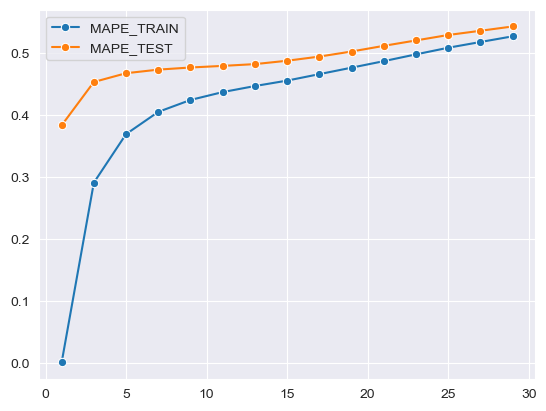

In [173]:
sns.set_style('darkgrid')
sns.lineplot(y=Mape_train,x=list(range(1,30,2)),label='MAPE_TRAIN',marker='o')
sns.lineplot(y=Mape_test,x=list(range(1,30,2)),label='MAPE_TEST',marker='o')

### CV Score Method

In [174]:
k_values = np.arange(1, 30, 2)
cv_mape_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X_train_half1, y_train_half1, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)

<Axes: >

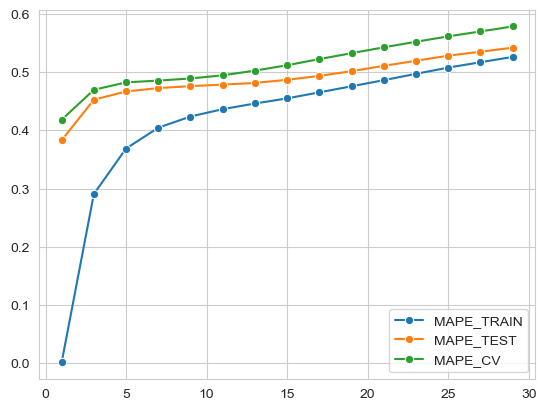

In [175]:
sns.set_style('whitegrid')
sns.lineplot(y=Mape_train,x=list(range(1,30,2)),label='MAPE_TRAIN',marker='o')
sns.lineplot(y=Mape_test,x=list(range(1,30,2)),label='MAPE_TEST',marker='o')
sns.lineplot(y=cv_mape_scores,x=list(range(1,30,2)),label='MAPE_CV',marker='o')